In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


[*********************100%***********************]  1 of 1 completed
/var/folders/4j/2p7_162x49x5g14mxrd2g1n40000gn/T/ipykernel_7392/2654470315.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Signal"][50:] = np.where(data["50_MA"][50:] > data["200_MA"][50:], 1, -1)


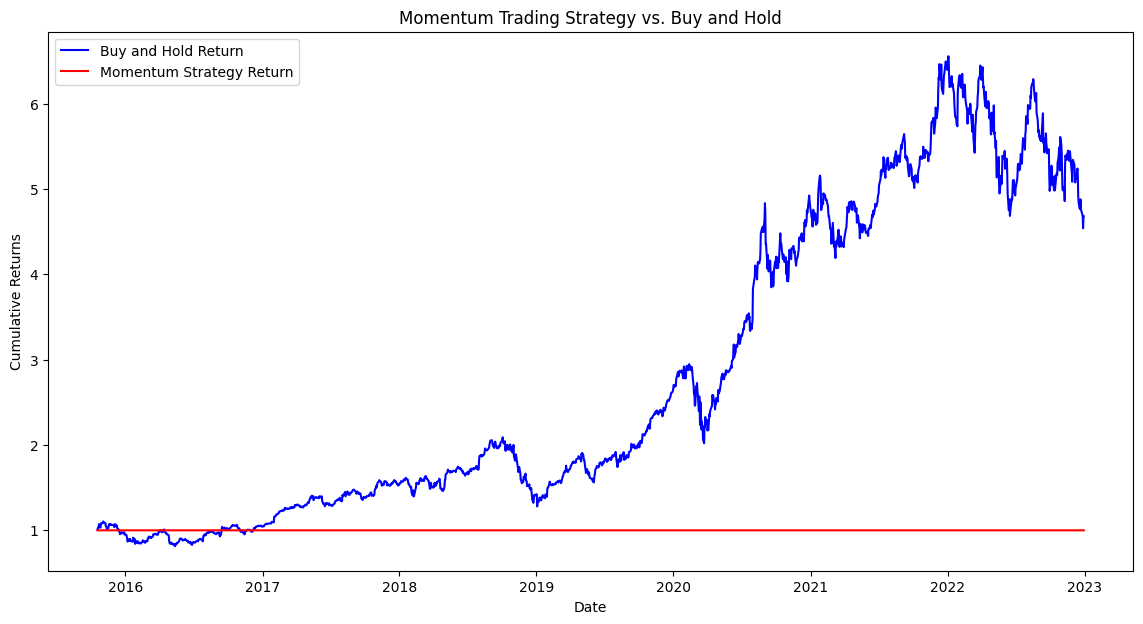

In [3]:
# Download historical data
ticker = "AAPL"  # Example ticker
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")

# Calculate moving averages
data["50_MA"] = data["Close"].rolling(window=50).mean()
data["200_MA"] = data["Close"].rolling(window=200).mean()

# Signal Generation
data["Signal"] = 0
data["Signal"][50:] = np.where(data["50_MA"][50:] > data["200_MA"][50:], 1, -1)

# Shift signal to avoid look-ahead bias
data["Position"] = data["Signal"].shift(1)
data.dropna(inplace=True)

# Calculate Returns
data["Daily_Return"] = data["Close"].pct_change()
data["Strategy_Return"] = data["Daily_Return"] * data["Position"]

# Calculate Cumulative Returns
data["Cumulative_Returns"] = (1 + data["Daily_Return"]).cumprod()
data["Cumulative_Strategy"] = (1 + data["Strategy_Return"]).cumprod()

# Plot Results
plt.figure(figsize=(14, 7))
plt.plot(data["Cumulative_Returns"], label="Buy and Hold Return", color="blue")
plt.plot(data["Cumulative_Strategy"], label="Momentum Strategy Return", color="red")
plt.title("Momentum Trading Strategy vs. Buy and Hold")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


In [4]:
data


Price,Adj Close,Close,High,Low,Open,Volume,50_MA,200_MA,Signal,Position,Daily_Return,Strategy_Return,Cumulative_Returns,Cumulative_Strategy
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,,
2015-10-16 00:00:00+00:00,25.069666,27.760000,28.000000,27.632500,27.945000,156930400,28.086900,30.332337,0,0.0,NaN,NaN,NaN,NaN
2015-10-19 00:00:00+00:00,25.225443,27.932501,27.937500,27.527500,27.700001,119036800,28.067950,30.335337,0,0.0,0.006214,0.0,1.006214,1.0
2015-10-20 00:00:00+00:00,25.686018,28.442499,28.542500,27.705000,27.834999,195871200,28.038200,30.344737,0,0.0,0.018258,0.0,1.024586,1.0
2015-10-21 00:00:00+00:00,25.683762,28.440001,28.895000,28.424999,28.500000,167180800,28.039550,30.354112,0,0.0,-0.000088,-0.0,1.024496,1.0
2015-10-22 00:00:00+00:00,26.076601,28.875000,28.875000,28.525000,28.582500,166616400,28.040850,30.363800,0,0.0,0.015295,0.0,1.040166,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,130.631363,131.860001,132.419998,129.639999,130.919998,63814900,144.131800,152.133100,0,0.0,-0.002798,-0.0,4.750000,1.0
2022-12-27 00:00:00+00:00,128.818405,130.029999,131.410004,128.720001,131.380005,69007800,143.964799,152.009600,0,0.0,-0.013878,-0.0,4.684078,1.0
